In [42]:
# import datasets
from nilearn import datasets
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
from nilearn.connectome import ConnectivityMeasure

import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

In [4]:
dataset

{'maps': 'C:\\Users\\alexf/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
 'labels': ['Background',
  'Frontal Pole',
  'Insular Cortex',
  'Superior Frontal Gyrus',
  'Middle Frontal Gyrus',
  'Inferior Frontal Gyrus, pars triangularis',
  'Inferior Frontal Gyrus, pars opercularis',
  'Precentral Gyrus',
  'Temporal Pole',
  'Superior Temporal Gyrus, anterior division',
  'Superior Temporal Gyrus, posterior division',
  'Middle Temporal Gyrus, anterior division',
  'Middle Temporal Gyrus, posterior division',
  'Middle Temporal Gyrus, temporooccipital part',
  'Inferior Temporal Gyrus, anterior division',
  'Inferior Temporal Gyrus, posterior division',
  'Inferior Temporal Gyrus, temporooccipital part',
  'Postcentral Gyrus',
  'Superior Parietal Lobule',
  'Supramarginal Gyrus, anterior division',
  'Supramarginal Gyrus, posterior division',
  'Angular Gyrus',
  'Lateral Occipital Cortex, superior division',
  'Lateral Occipital Cortex

In [5]:
atlas_filename

'C:\\Users\\alexf/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz'

In [6]:
labels

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

In [46]:
print(len(labels))

49


## Get Data

In [7]:
data = datasets.fetch_development_fmri(n_subjects=1)
fmri_filenames = data.func[0]

In [8]:
data.confounds

['C:\\Users\\alexf/nilearn_data\\development_fmri\\development_fmri\\sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv']

In [10]:
fmri_filenames

'C:\\Users\\alexf/nilearn_data\\development_fmri\\development_fmri\\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'

In [23]:
# parent paths of pre-processed data
subjectDir = "../data/preprocessed/sub-9001/"
sessionDir = "ses-1/"

#example of arrows slice file path
arrows_slices_file_path = \
    subjectDir + sessionDir + \
    "func/sub-9001_ses-1_task-arrows_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"

## Use NiftiLabelMasker

In [24]:
# Using NiftiLabelsMasker to extract signals on a parcellation defined by labels
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=5)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
#time_series = masker.fit_transform(fmri_filenames, confounds=data.confounds)
time_series = masker.fit_transform(arrows_slices_file_path)

[NiftiLabelsMasker.fit_transform] loading data from C:\Users\alexf/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('../data/preprocessed/sub-9001/ses-1/func/sub-9001_ses-1_task-arrows_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\alexf/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, dtype=None, memory=Memory(location=nilearn_cache\joblib), memory_level=1, verbose=5)
[NiftiLabelsMasker.transform_single_imgs] Loa

In [25]:
time_series.shape

(352, 48)

In [26]:
# get number of scans (over time, per se)
time_series_scan_num = len(time_series)

# get number of voxels
# just get it from the very first scan frame
time_series_voxels_num = len(time_series[0])

## Compute and Display a correlation matrix

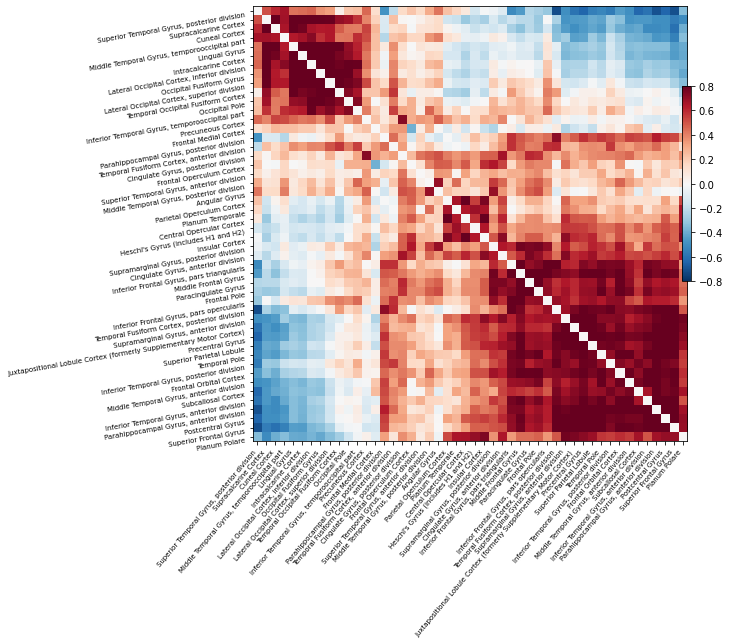

In [27]:
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Plot the correlation matrix
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, reorder=True)

C:\Users\alexf\Anaconda3\envs\CSML1030\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexf\Anaconda3\envs\CSML1030\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexf\Anaconda3\envs\CSML1030\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opene

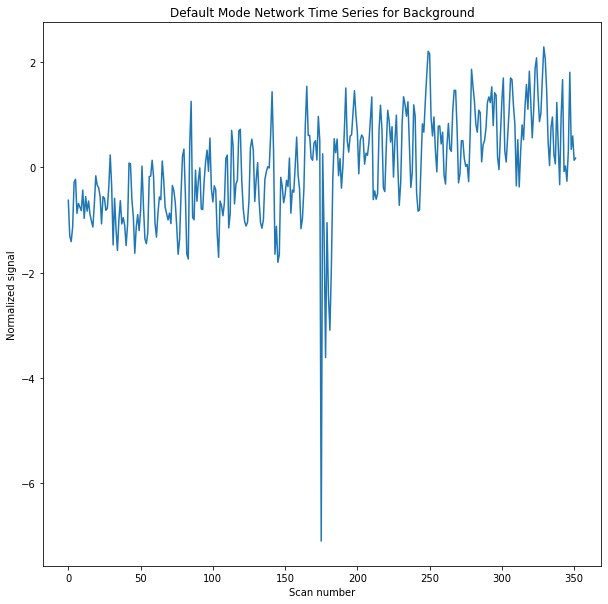

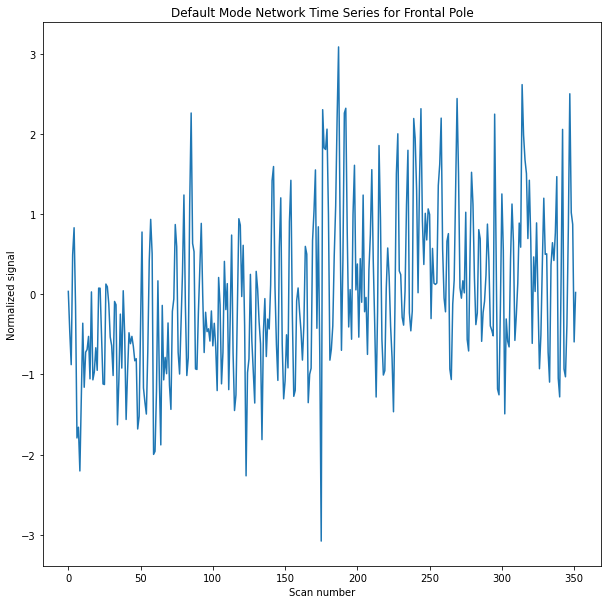

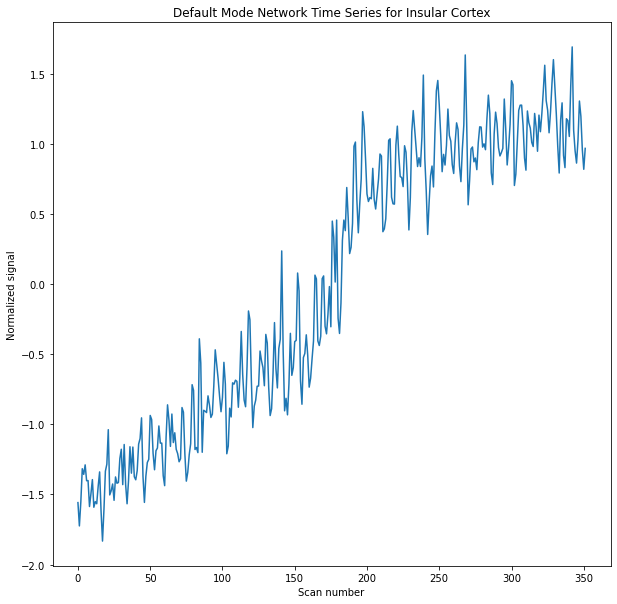

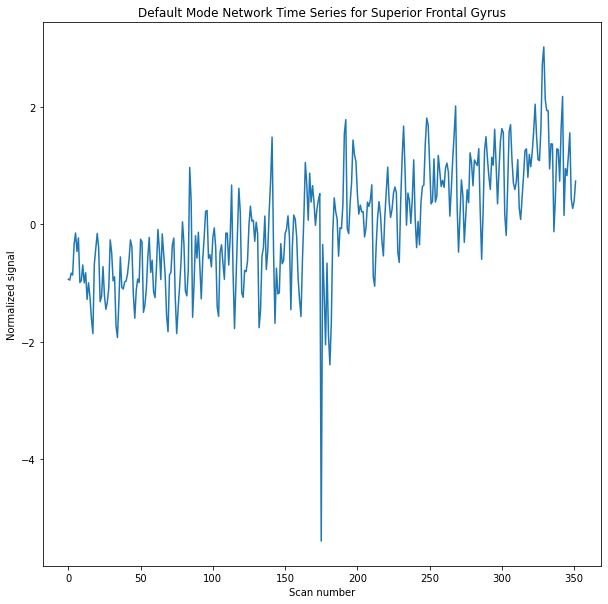

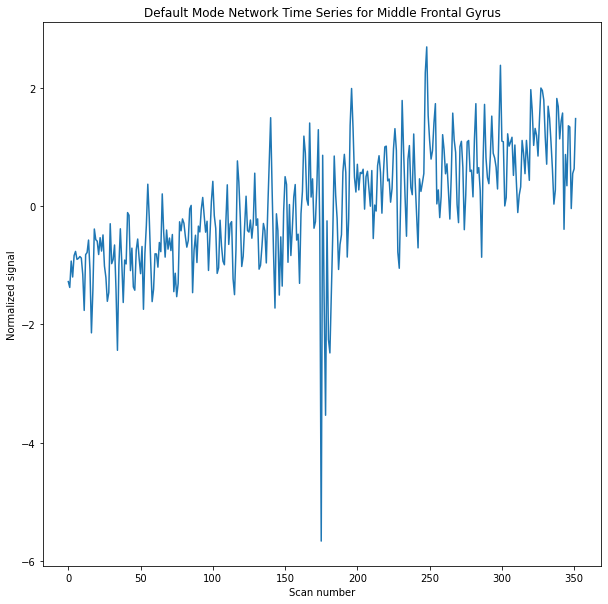

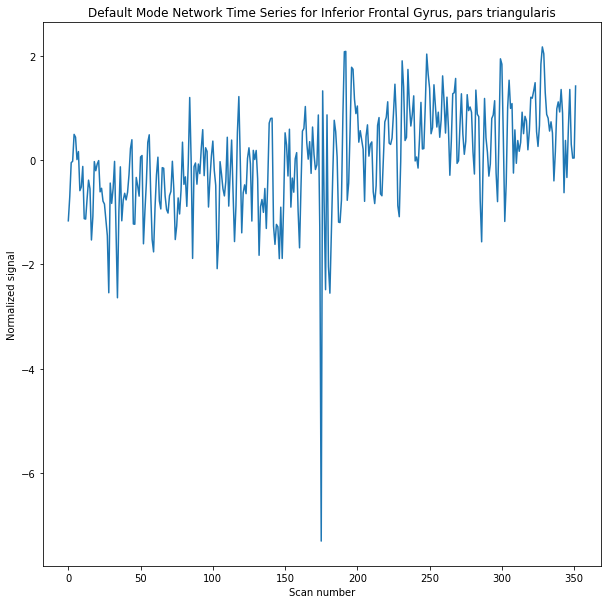

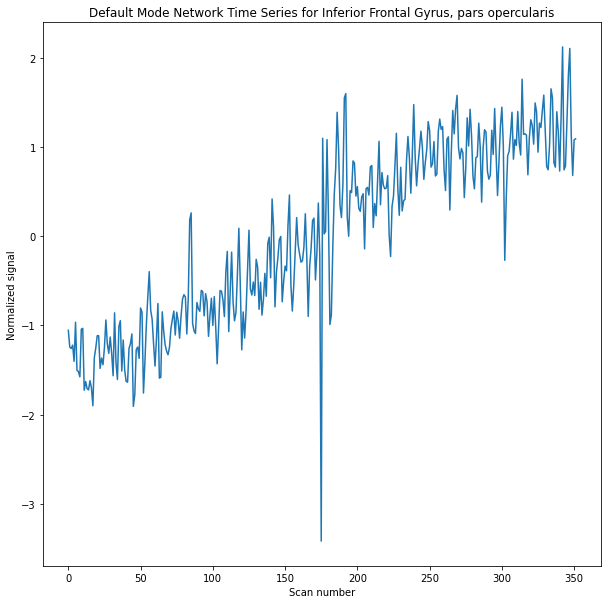

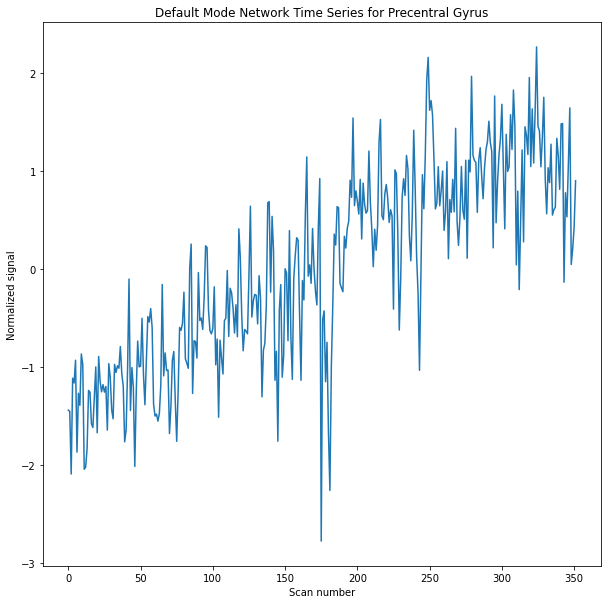

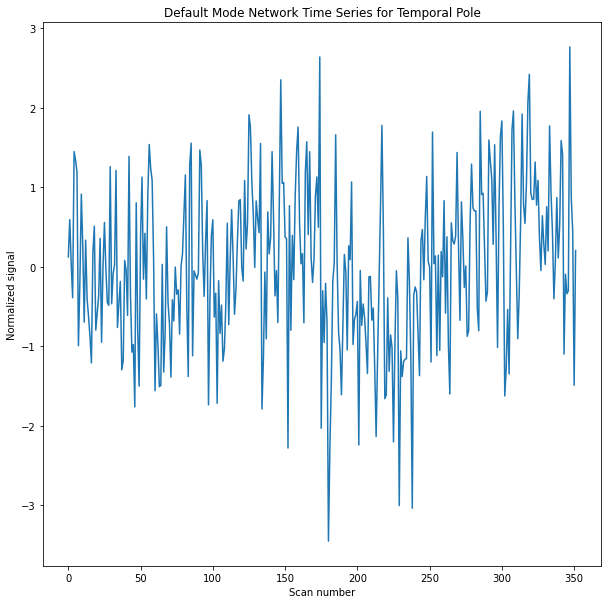

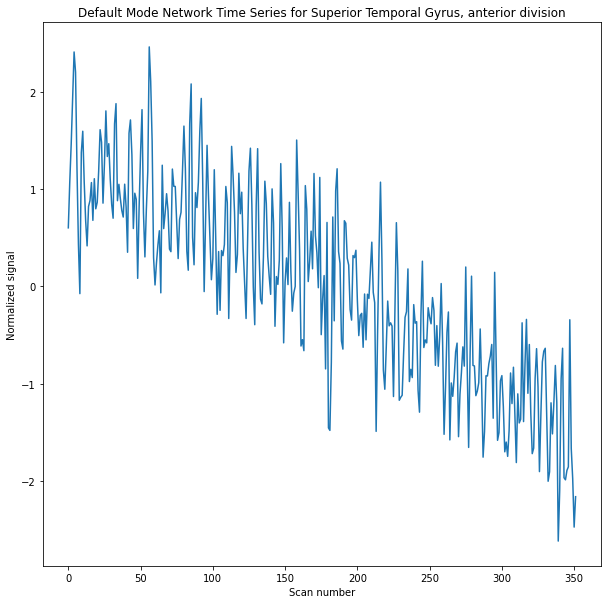

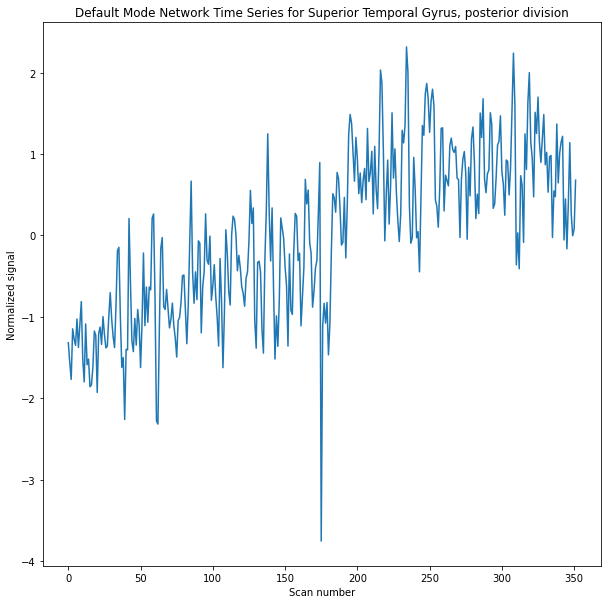

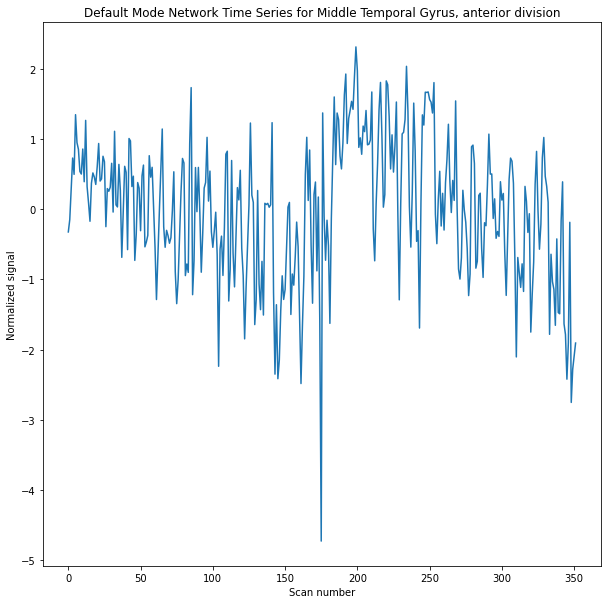

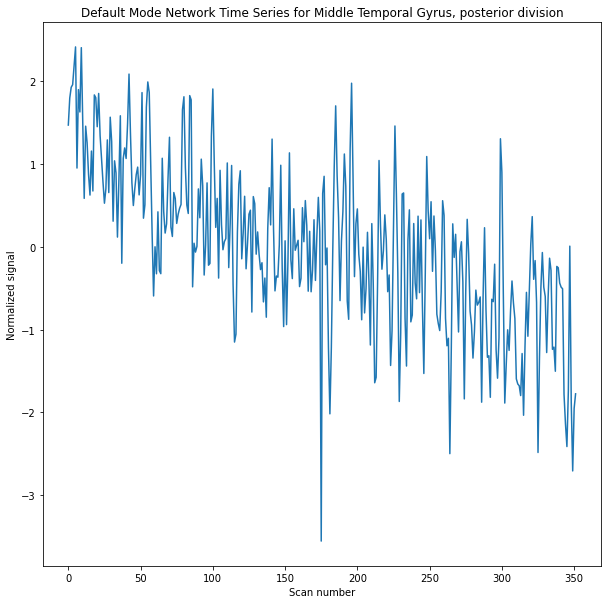

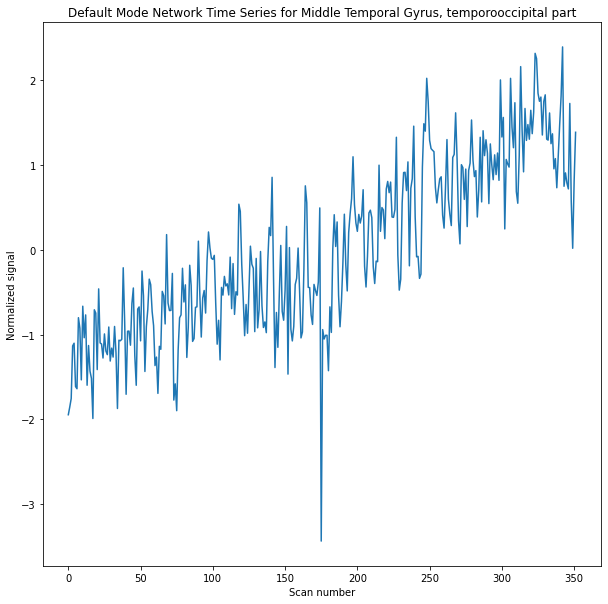

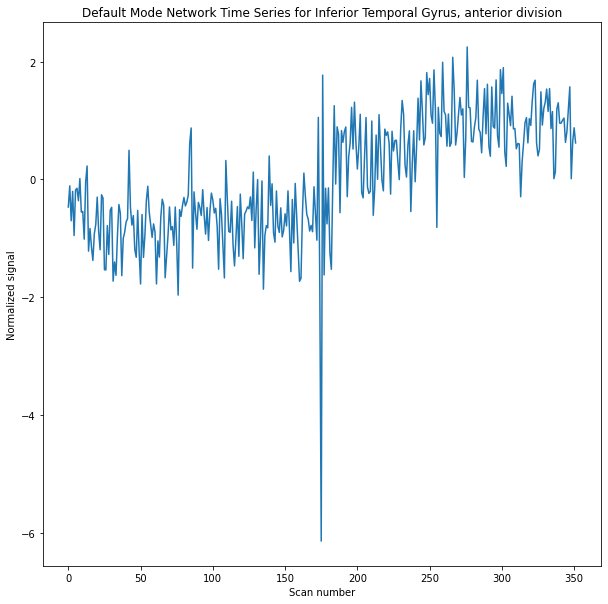

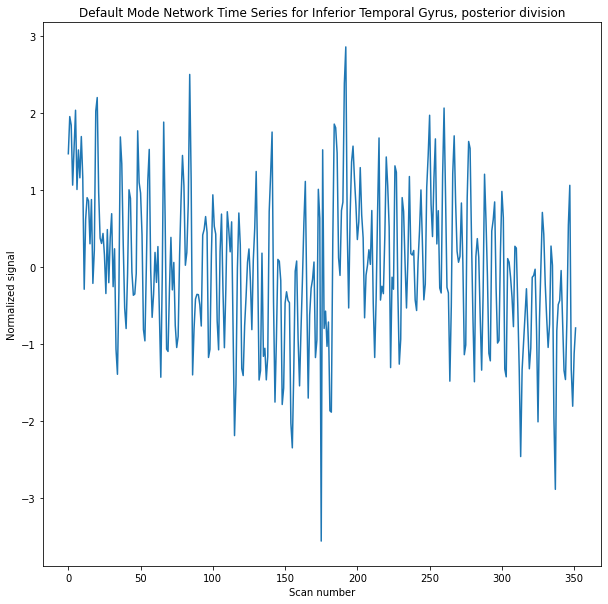

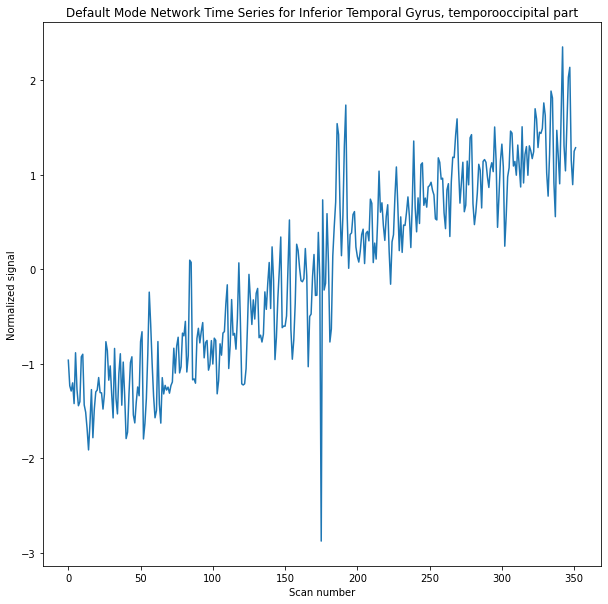

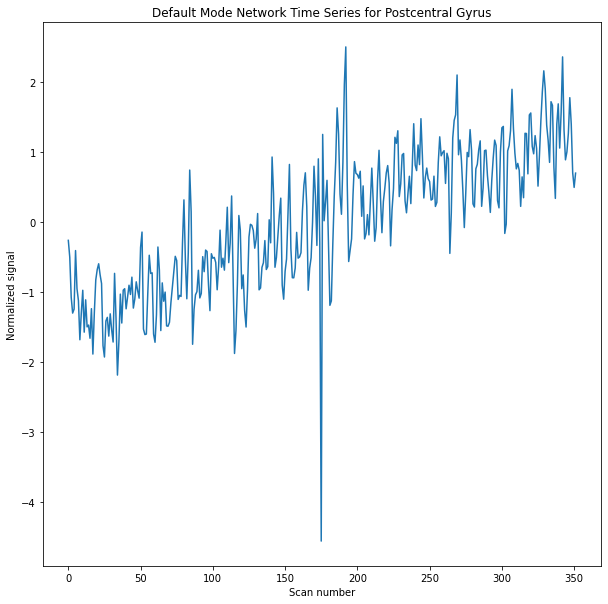

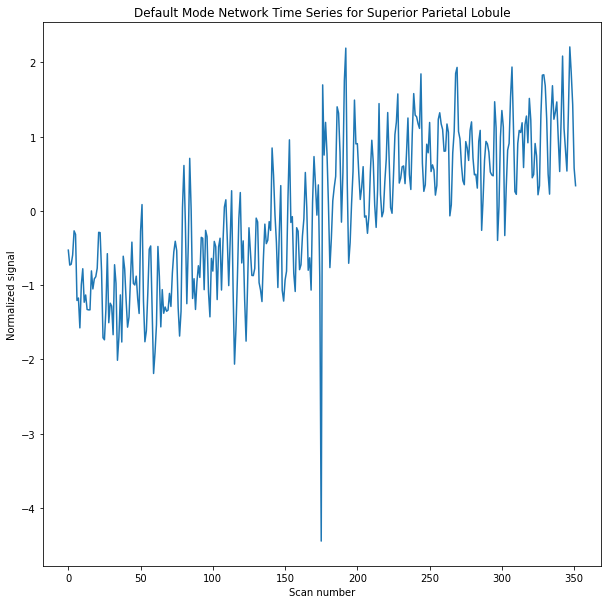

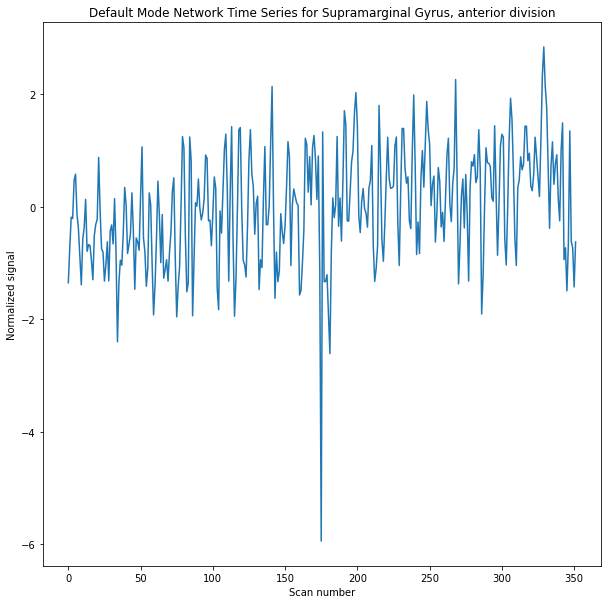

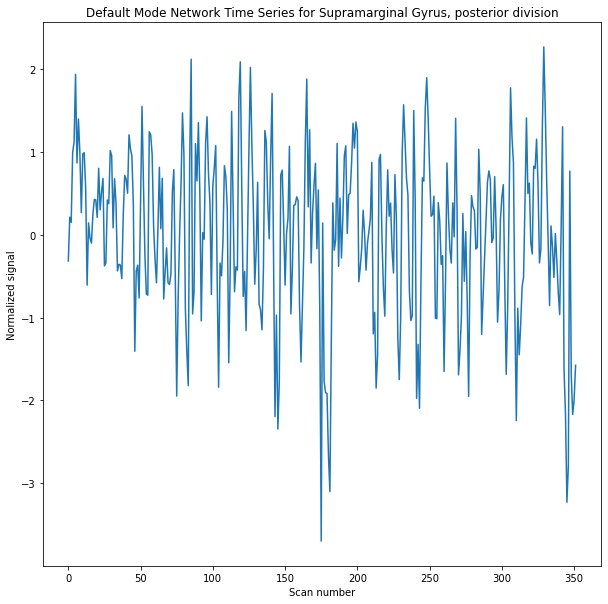

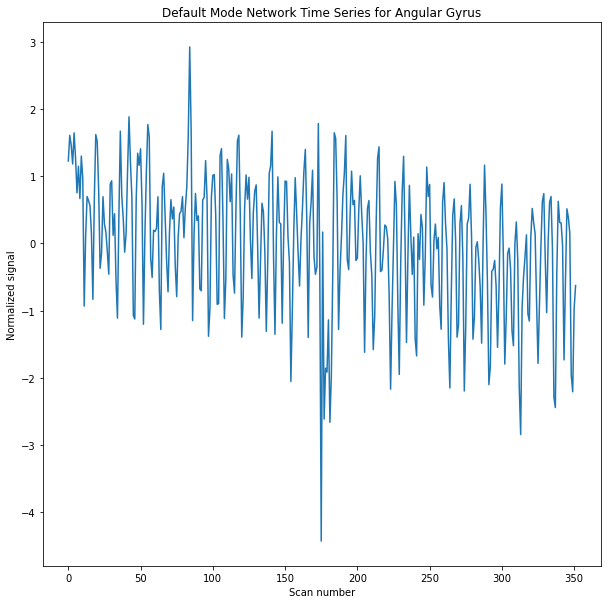

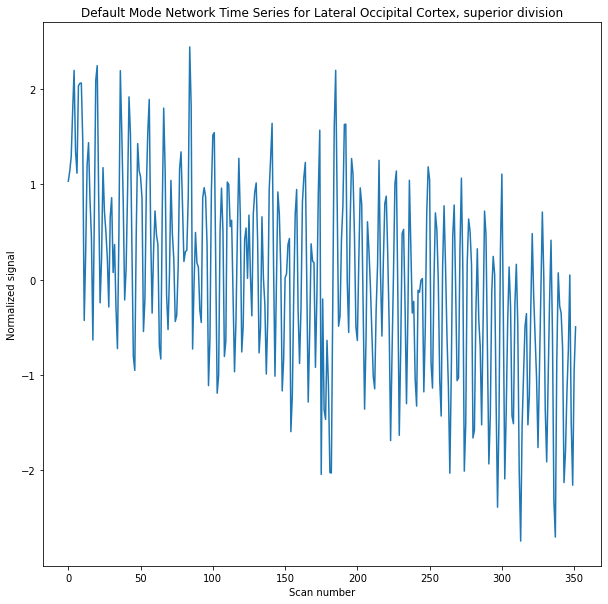

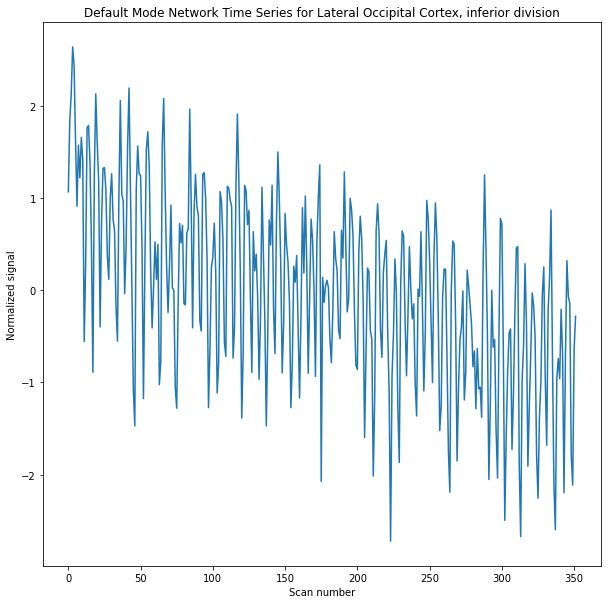

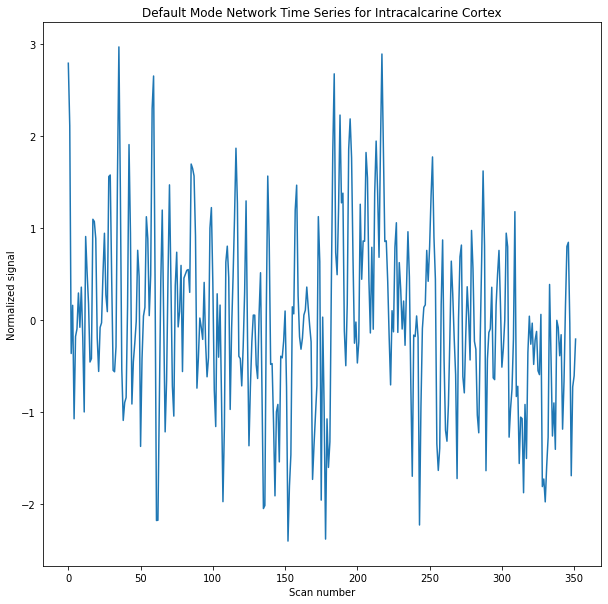

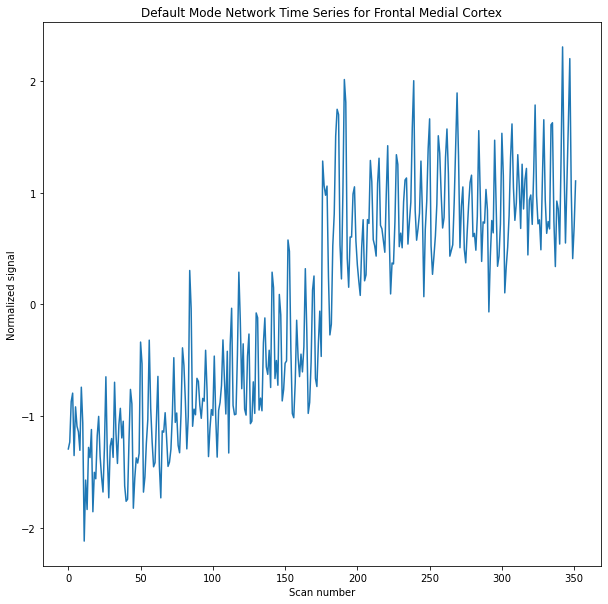

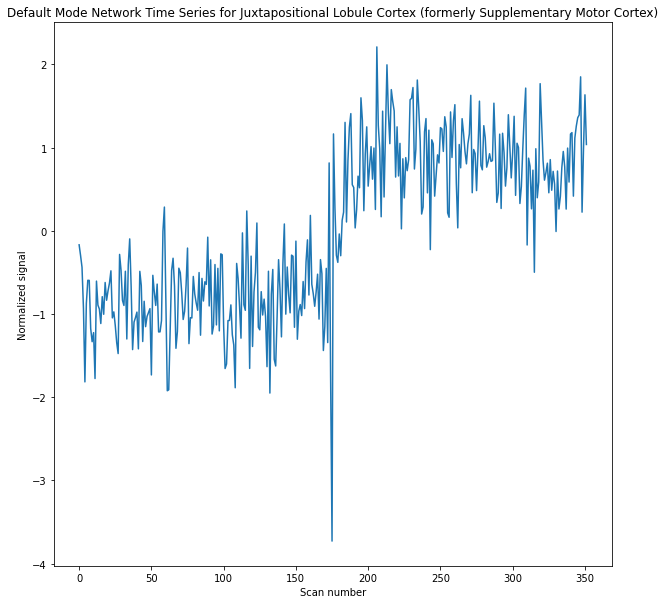

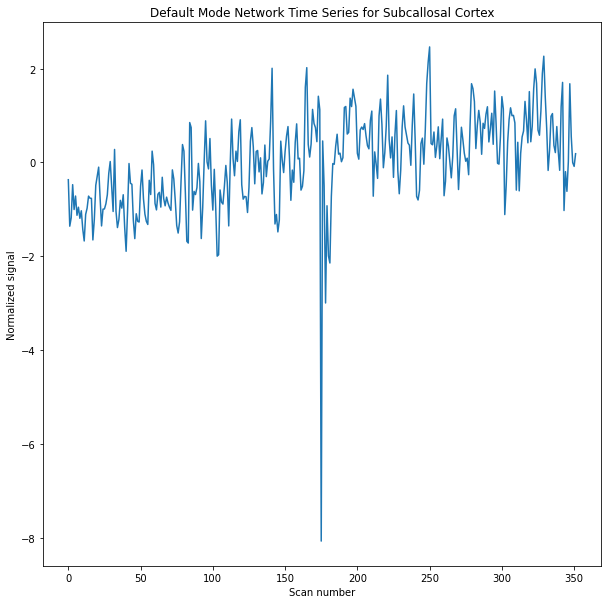

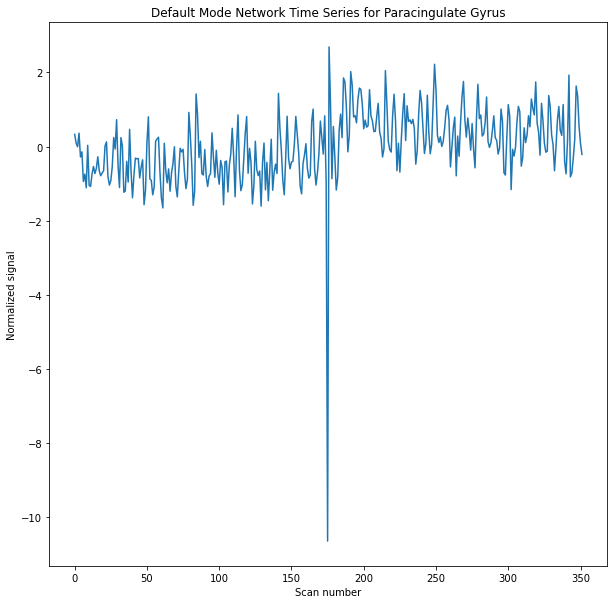

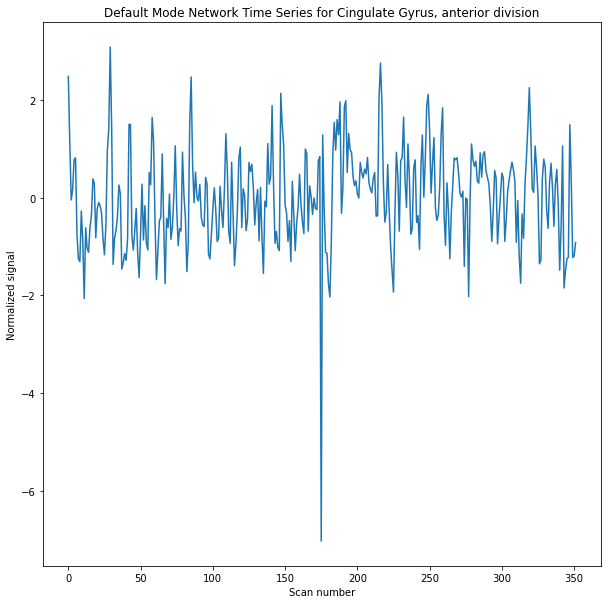

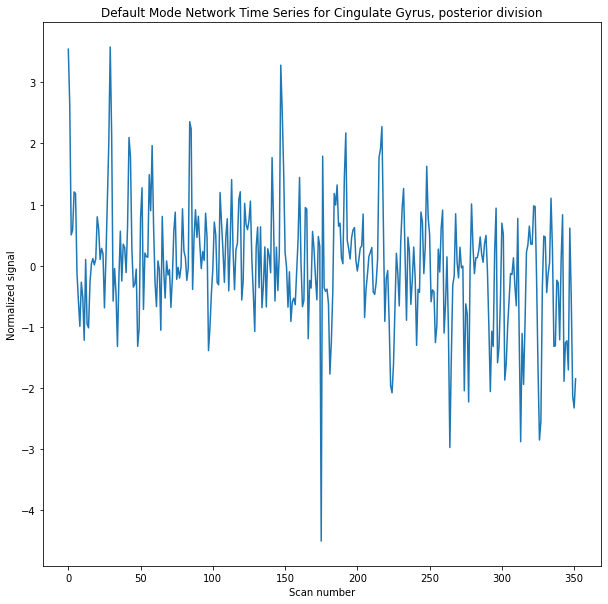

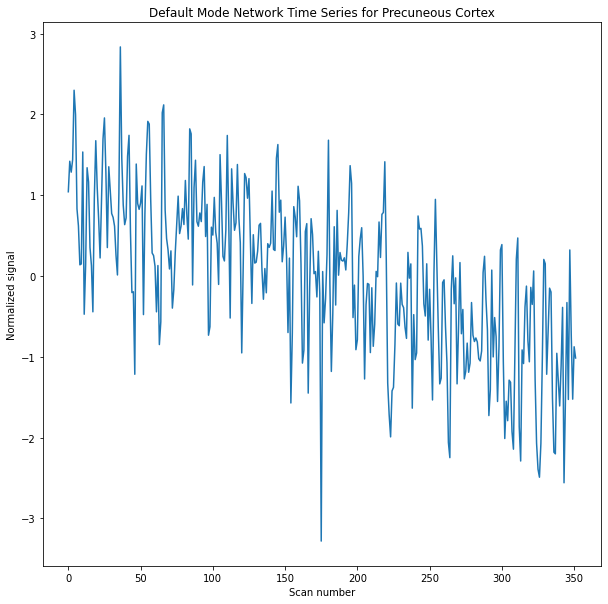

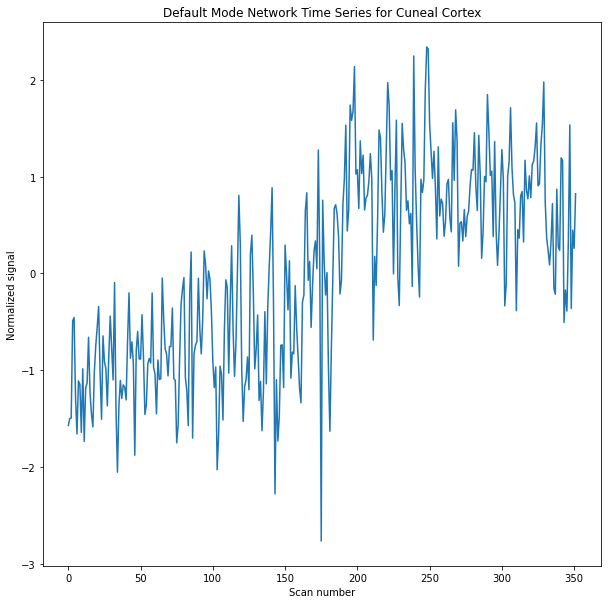

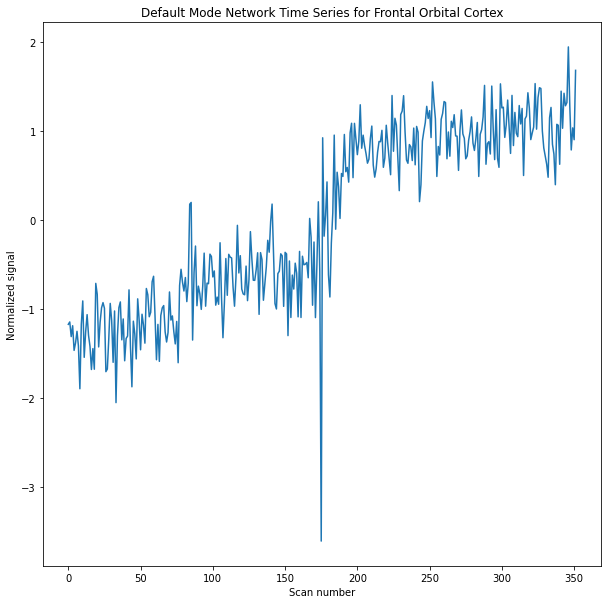

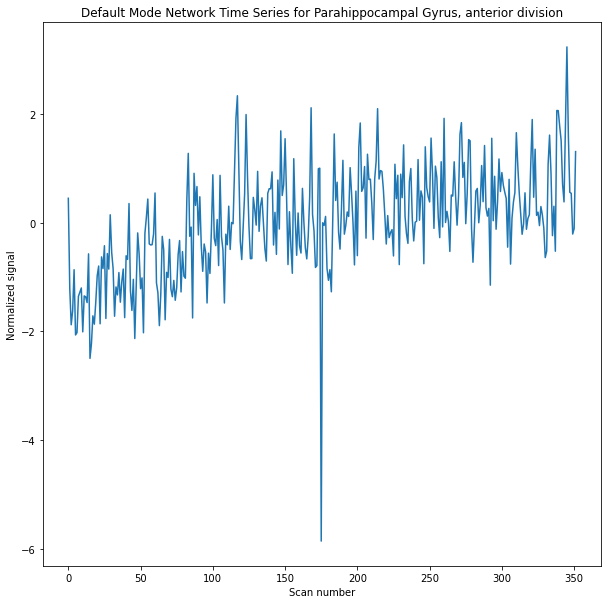

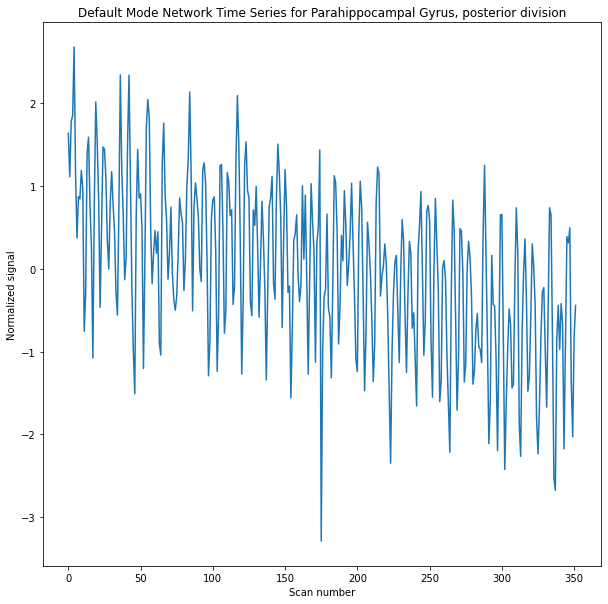

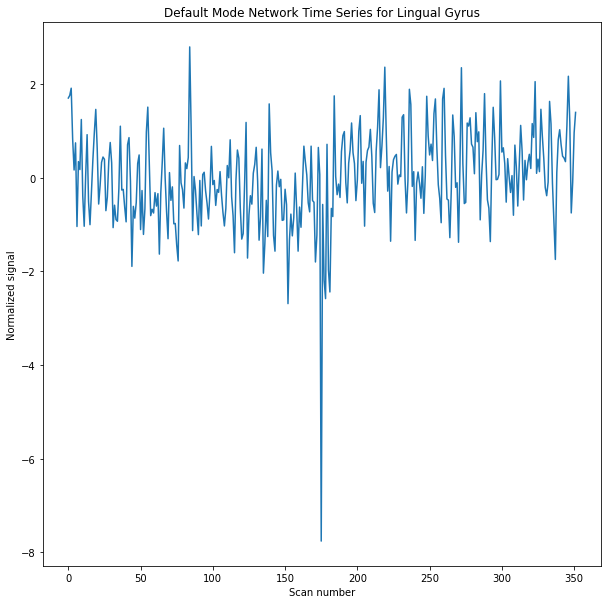

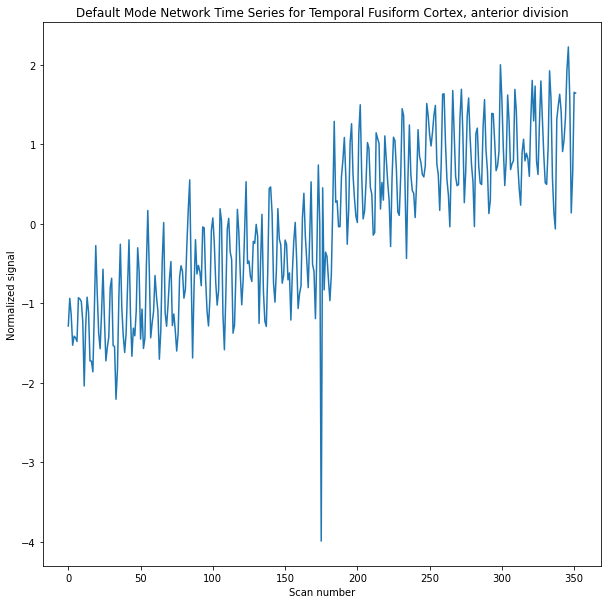

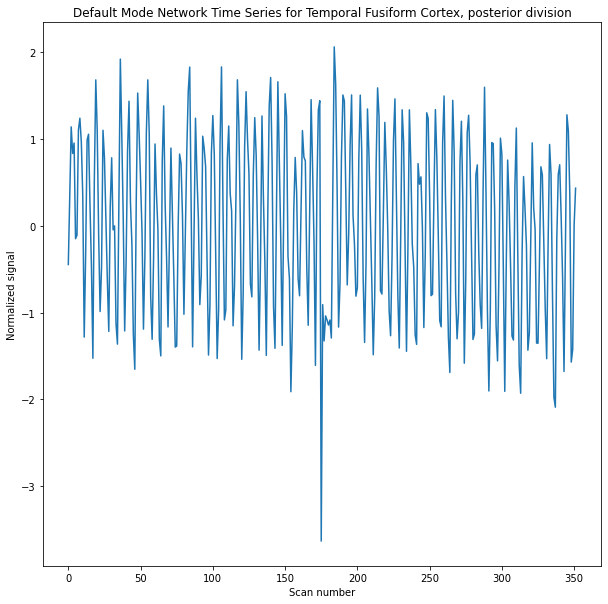

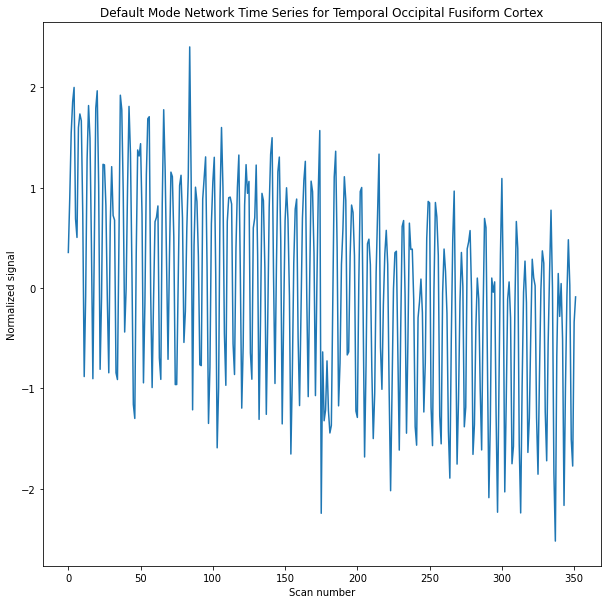

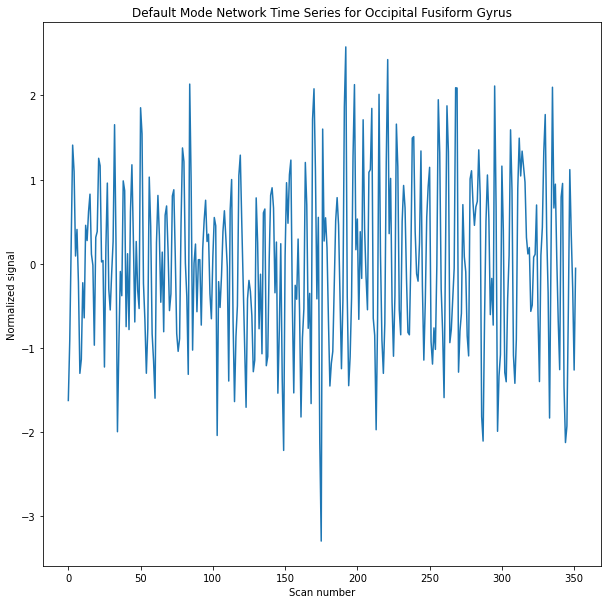

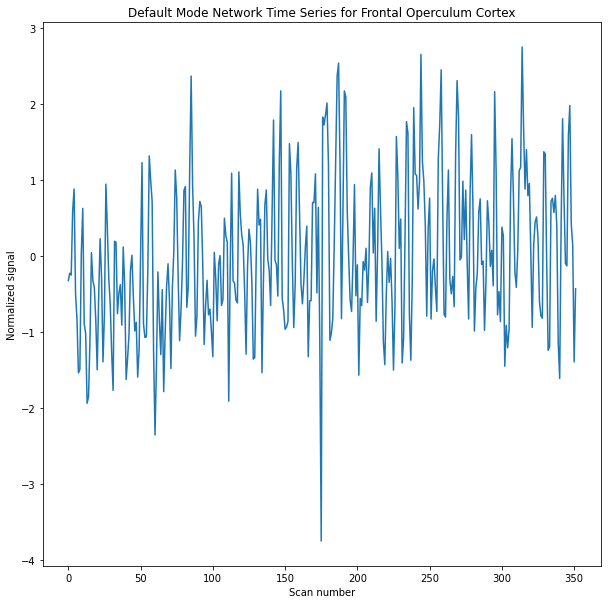

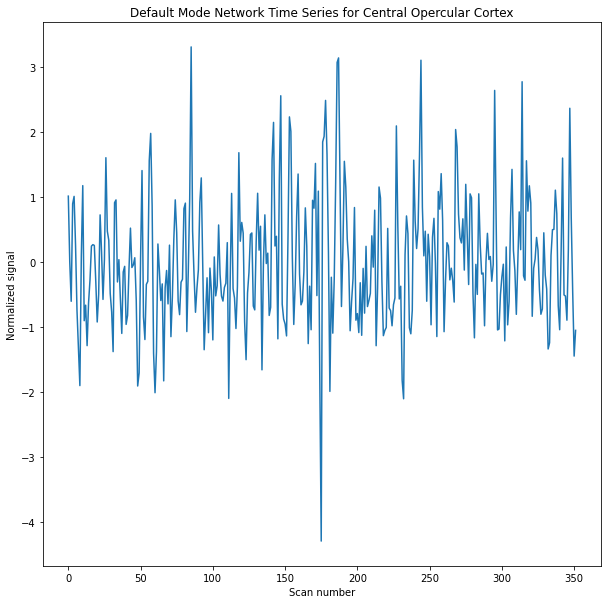

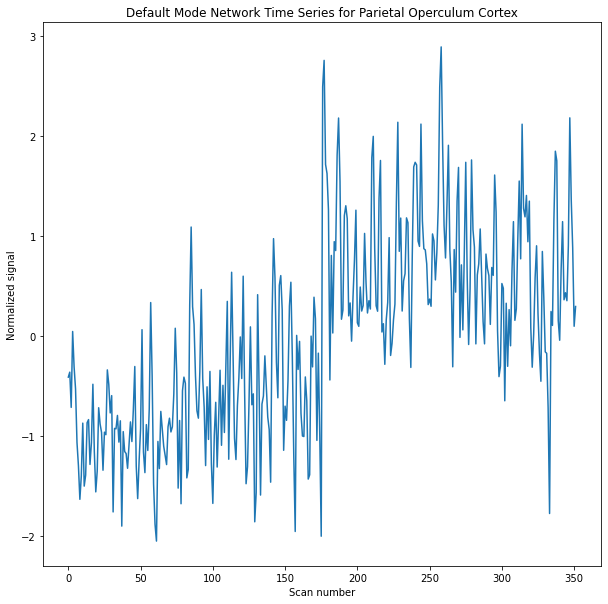

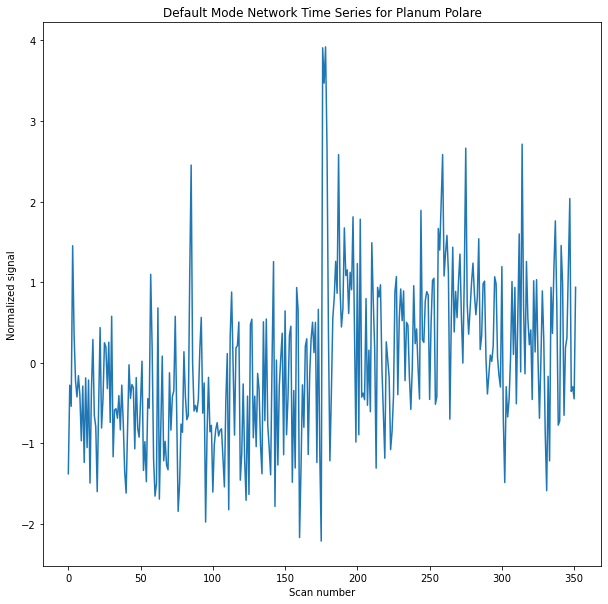

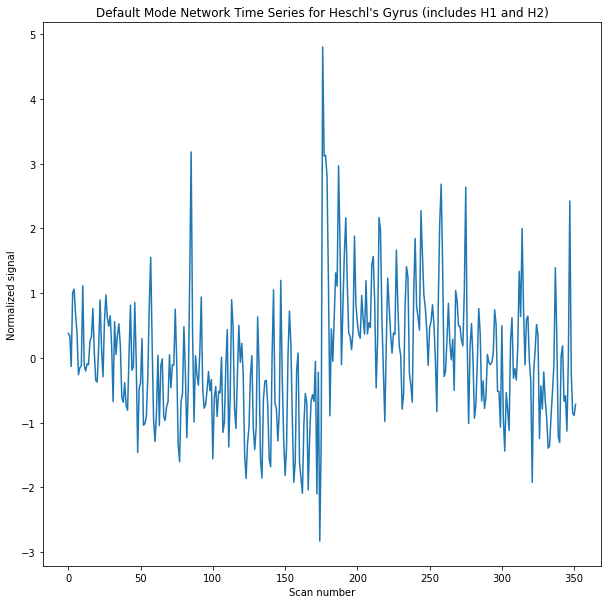

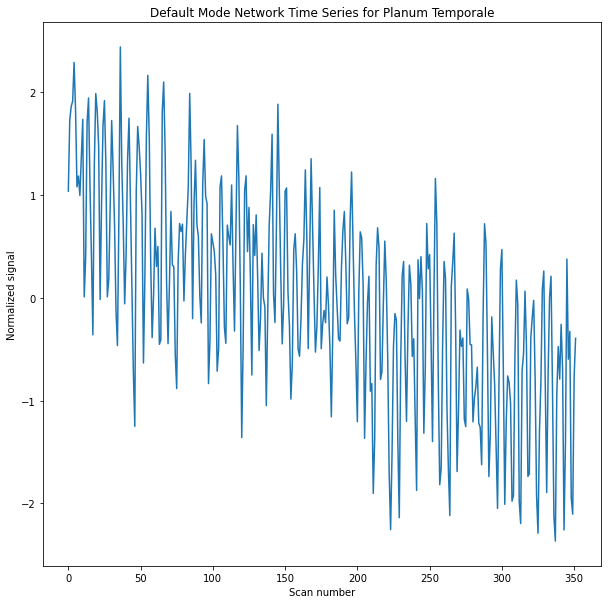

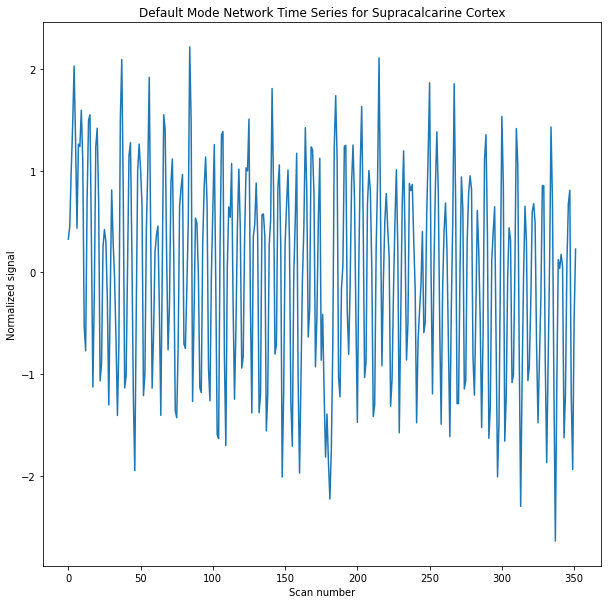

In [40]:
for time_serie, label in zip(time_series.T, labels):
    #plt.figure(figsize=(5,5))
    plt.figure(figsize=(10, 10))
    plt.plot(time_serie, label=label)
    plt.title('Default Mode Network Time Series for ' + label)
    plt.xlabel('Scan number')
    plt.ylabel('Normalized signal')
    


#plt.legend()
#plt.tight_layout()

## Compute partial correlation matrix

In [43]:
connectivity_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrix = connectivity_measure.fit_transform(
    [time_series])[0]

In [44]:
partial_correlation_matrix

array([[ 1.        ,  0.09182992, -0.06718664, ...,  0.02494406,
        -0.04384068,  0.14818773],
       [ 0.09182992,  1.        ,  0.02119308, ...,  0.04352448,
         0.09839949, -0.06099231],
       [-0.06718664,  0.02119308,  1.        , ...,  0.06253596,
        -0.00658287,  0.13322407],
       ...,
       [ 0.02494406,  0.04352448,  0.06253596, ...,  1.        ,
        -0.0073715 ,  0.05791084],
       [-0.04384068,  0.09839949, -0.00658287, ..., -0.0073715 ,
         1.        ,  0.12534727],
       [ 0.14818773, -0.06099231,  0.13322407, ...,  0.05791084,
         0.12534727,  1.        ]])

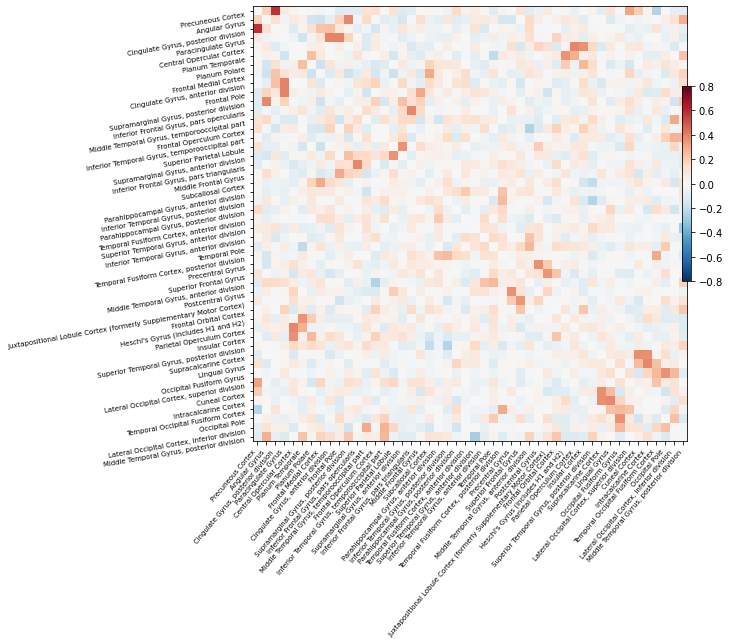

In [45]:
# Mask the main diagonal for visualization:
np.fill_diagonal(partial_correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(partial_correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, reorder=True)

## Display connectome

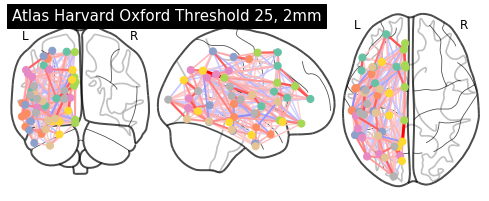

In [50]:
# Mean correlation matrix across 10 subjects can be grabbed like this,
# using connectome measure object
mean_correlation_matrix = connectivity_measure.mean_

# grab center coordinates for atlas labels
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_filename)

# plot connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="80%",
                         title='Atlas Harvard Oxford Threshold 25, 2mm')

In [51]:
# grab center coordinates for probabilistic atlas
coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img=atlas_filename)

# plot connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="80%", title='MSDL (probabilistic)')

DimensionError: Input data has incompatible dimensionality: Expected dimension is 4D and you provided a 3D image. See http://nilearn.github.io/manipulating_images/input_output.html.